In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import glob
import math
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
#import mglearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
#from mglearn.plot_helpers import cm2, cm3, discrete_scatter
from sklearn.tree._tree import TREE_LEAF
from IPython.display import display, Image
from sklearn.externals.six import StringIO  
#import pydotplus
from sklearn.tree import _tree
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit,learning_curve
import matplotlib.patches as mpatches
import time
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
import statsmodels.formula.api as sm
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import preprocessing


Using TensorFlow backend.


In [2]:
df= pd.read_csv('adult.csv')

In [3]:
df[df == '?'] = np.nan

C:\Users\harki\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [4]:
df['income'] = df['income'].map({'<=50K':0, '>50K':1})
df = df.dropna()

In [5]:
df=df.drop(columns='fnlwgt')#drops column:fnlwgt


In [6]:
X = df.drop(['income'], axis=1)
y = df['income']




categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex','native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X[feature] = le.fit_transform(X[feature])
#         X_test[feature] = le.transform(X_test[feature])

In [7]:
X=X.values
y=y.values

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

C:\Users\harki\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\harki\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=5)

In [10]:
X_test

array([[ 2.55527301, -0.20895464,  0.17476277, ..., -0.21858598,
        -2.41500465, -5.30403419],
       [ 1.0325595 , -0.20895464,  0.17476277, ..., -0.21858598,
        -0.24468201,  0.26492394],
       [-0.64242537, -0.20895464,  0.17476277, ..., -0.21858598,
        -0.49510385,  0.26492394],
       ...,
       [ 1.87005193, -0.20895464, -0.34986472, ..., -0.21858598,
        -0.07773411,  0.26492394],
       [-1.09923942, -0.20895464,  0.17476277, ..., -0.21858598,
         0.75700537,  0.26492394],
       [-0.10947564, -0.20895464,  0.17476277, ..., -0.21858598,
        -0.91247359,  0.26492394]])

In [11]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [12]:
def plot_learning_curve(estimator, title, X_train, y_train, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    print('Cross Validation Score :',test_scores_mean)
    print('Training Score :',train_scores_mean)

# KNN Classifier

In [20]:
# KNN Classifier
knears_params = {"n_neighbors": list(range(2,6,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params).fit(X_train, y_train)

# KNears best estimator
knears_neighbors = grid_knears.best_estimator_
print('Best parameters of KNN classifiers are:',knears_neighbors)

C:\Users\harki\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters of KNN classifiers are: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [21]:
# Confusion Matrix for Decision Tree 
Knn_pred = knears_neighbors.predict(X_test)


In [22]:
print('Confusion matrix:')
print('KNN Classifier Accuracy on test set:', round(accuracy_score(y_test,Knn_pred) * 100, 2).astype(str) + '%')
print(confusion_matrix(y_test,Knn_pred))
print(classification_report(y_test,Knn_pred))

Confusion matrix:
KNN Classifier Accuracy on test set: 82.9%
[[6167  646]
 [ 901 1335]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6813
           1       0.67      0.60      0.63      2236

   micro avg       0.83      0.83      0.83      9049
   macro avg       0.77      0.75      0.76      9049
weighted avg       0.82      0.83      0.83      9049



In [29]:
print('KNN Classifier Accuracy on test set:', round(accuracy_score(y_test,Knn_pred) * 100, 2).astype(str) + '%')


KNN Classifier Accuracy on test set: 82.9%


In [18]:
print('Confusion matrix:')
print('KNN Classifier Accuracy on test set:', round(accuracy_score(y_test,Knn_pred) * 100, 2).astype(str) + '%')
print(confusion_matrix(y_test,Knn_pred))
print(classification_report(y_test,Knn_pred))

Confusion matrix:
KNN Classifier Accuracy on test set: 82.9%
[[6167  646]
 [ 901 1335]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6813
           1       0.67      0.60      0.63      2236

   micro avg       0.83      0.83      0.83      9049
   macro avg       0.77      0.75      0.76      9049
weighted avg       0.82      0.83      0.83      9049



In [19]:
print('KNN Classifier Accuracy on test set:', round(accuracy_score(y_test,Knn_pred) * 100, 2).astype(str) + '%')

KNN Classifier Accuracy on test set: 82.9%


<module 'matplotlib.pyplot' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

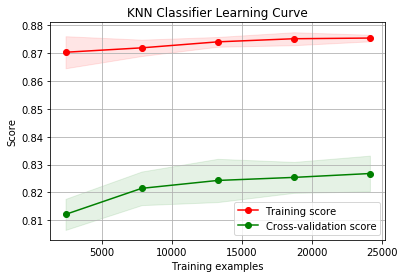

In [20]:
title = 'KNN Classifier Learning Curve'
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = knears_neighbors
plot_learning_curve(estimator, title, X_train, y_train, ylim=None, cv=cv, n_jobs=4)

In [49]:
 from sklearn.model_selection import cross_validate


In [50]:
trainerr = []
crosserr = []
traintim = []
crosstim = []
Ks = []
for K in range(1,31):
    knnmodel = KNeighborsClassifier(n_neighbors = K, leaf_size = 1, weights = 'uniform',algorithm='auto', metric = 'manhattan')
    scores = cross_validate(knnmodel, X_train, y_train, scoring="accuracy",cv=5,
                            return_estimator = True, return_train_score = True, n_jobs = 3)
    trainerr.append(1-np.mean(scores['train_score']))
    crosserr.append(1-np.mean(scores['test_score']))
    traintim.append(np.mean(scores['fit_time']))
    crosstim.append(np.mean(scores['score_time']))
    Ks.append(K)

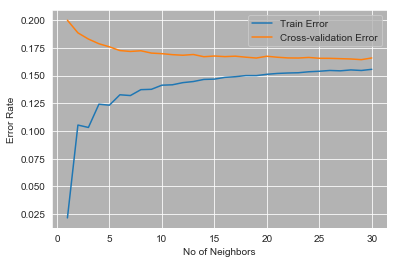

In [53]:
sns.set_style("darkgrid", {"axes.facecolor": ".7"})
plt.plot(Ks, trainerr)
plt.plot(Ks, crosserr)
plt.xlabel('No of Neighbors')
plt.ylabel('Error Rate')
plt.legend(['Train Error','Cross-validation Error'])

# ANN

In [21]:
dense_layers = [1,2,3]
layer_sizes = {1:[32,16,8],2:[64,32,16]}

In [22]:
# Defining model for Neural Networks
for dense_layers in dense_layers:
    for layer_size in layer_sizes:
        model = Sequential()
        
        #Input Layer
        model.add(Dense(name= 'Input_layer',units=X_train.shape[1],input_shape=(X_train.shape[1],),activation = "relu"))
        
        #Dense Layers
        model.add(Dense(name= 'Dense_layer-1',units = layer_sizes[layer_size][0], activation="sigmoid"))
        for l in range(dense_layers-1):
            model.add(Dense(name= 'Dense_layer-{}'.format(l+2),units = layer_sizes[layer_size][l+1], activation="sigmoid"))
            
        #Output Layer
        model.add(Dense(name= 'Output_layer',units = 2, activation="sigmoid"))
        
        Name = 'Energy Train - Dense{}--nodes--dense{}'.format(dense_layers,layer_sizes[layer_size],int(time.time()))
        tensorboard = TensorBoard(log_dir = 'logs\{}'.format(Name))
        
        model.compile(loss= 'sparse_categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
        model.fit(X_train,y_train,batch_size=128,epochs=30,validation_split = 0.3,callbacks=[tensorboard])

Train on 14779 samples, validate on 6334 samples
Epoch 1/30
14779/14779 [==============================] - 1s 87us/sample - loss: 0.5881 - accuracy: 0.7105 - val_loss: 0.4972 - val_accuracy: 0.7539
Epoch 2/30
14779/14779 [==============================] - 0s 26us/sample - loss: 0.4622 - accuracy: 0.7619 - val_loss: 0.4257 - val_accuracy: 0.8045
Epoch 3/30
14779/14779 [==============================] - 0s 28us/sample - loss: 0.4098 - accuracy: 0.8140 - val_loss: 0.3932 - val_accuracy: 0.8199
Epoch 4/30
14779/14779 [==============================] - 0s 28us/sample - loss: 0.3882 - accuracy: 0.8212 - val_loss: 0.3812 - val_accuracy: 0.8263
Epoch 5/30
14779/14779 [==============================] - 0s 31us/sample - loss: 0.3777 - accuracy: 0.8263 - val_loss: 0.3732 - val_accuracy: 0.8298
Epoch 6/30
14779/14779 [==============================] - 0s 29us/sample - loss: 0.3705 - accuracy: 0.8289 - val_loss: 0.3670 - val_accuracy: 0.8333
Epoch 7/30
14779/14779 [==============================] -

14779/14779 [==============================] - 0s 23us/sample - loss: 0.3350 - accuracy: 0.8430 - val_loss: 0.3359 - val_accuracy: 0.8418
Epoch 20/30
14779/14779 [==============================] - 0s 23us/sample - loss: 0.3333 - accuracy: 0.8424 - val_loss: 0.3372 - val_accuracy: 0.8371
Epoch 21/30
14779/14779 [==============================] - 0s 23us/sample - loss: 0.3331 - accuracy: 0.8447 - val_loss: 0.3357 - val_accuracy: 0.8409
Epoch 22/30
14779/14779 [==============================] - 0s 24us/sample - loss: 0.3324 - accuracy: 0.8445 - val_loss: 0.3354 - val_accuracy: 0.8416
Epoch 23/30
14779/14779 [==============================] - 1s 34us/sample - loss: 0.3332 - accuracy: 0.8422 - val_loss: 0.3357 - val_accuracy: 0.8431
Epoch 24/30
14779/14779 [==============================] - 0s 33us/sample - loss: 0.3330 - accuracy: 0.8438 - val_loss: 0.3352 - val_accuracy: 0.8424
Epoch 25/30
14779/14779 [==============================] - 0s 30us/sample - loss: 0.3317 - accuracy: 0.8449 - va

In [25]:
print('Neural Networks Accuracy on test set:', round(model.evaluate(X_test, y_test, 
                                                                        batch_size=128)[1] * 100, 2).astype(str) + '%')

9049/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Neural Networks Accuracy on test set: 84.72%


In [61]:
# NN_pred_test = model.predict_classes(X_test)
# # Confusion Matrix for Decision Tree 
# NN_pred_test = model.predict_classes(X_test,batch_size=200, verbose=0)
# NN_cm_test = confusion_matrix(y_test,NN_pred_test)
# NN_Conf_matrix_test = pd.DataFrame(NN_cm_test,index = ['Predicted Fraud','Predicted No Fraud'],\
#                              columns = ['Actual Fraud','Actual No Fraud'])
# NN_Conf_matrix_test

In [17]:
dense_layers = [1,2,3]
layer_sizes = {1:[32,16,8],2:[64,32,16]}
# Defining model for Neural Networks
for dense_layers in dense_layers:
    for layer_size in layer_sizes:
        model = Sequential()
        
        #Input Layer
        model.add(Dense(name= 'Input_layer',units=X_train.shape[1],input_shape=(X_train.shape[1],),activation = "relu"))
        
        #Dense Layers
        model.add(Dense(name= 'Dense_layer-1',units = layer_sizes[layer_size][0], activation="relu"))
        for l in range(dense_layers-1):
            model.add(Dense(name= 'Dense_layer-{}'.format(l+2),units = layer_sizes[layer_size][l+1], activation="relu"))
            
        #Output Layer
        model.add(Dense(name= 'Output_layer',units = 2, activation="sigmoid"))
        
        Name = 'Energy Train - Dense{}--nodes--dense{}'.format(dense_layers,layer_sizes[layer_size],int(time.time()))
        tensorboard = TensorBoard(log_dir = 'logs\{}'.format(Name))
        
        model.compile(loss= 'sparse_categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
        model.fit(X_train,y_train,batch_size=128,epochs=30,validation_split = 0.3,callbacks=[tensorboard])

Train on 14779 samples, validate on 6334 samples
Epoch 1/30
14779/14779 [==============================] - 1s 98us/sample - loss: 0.5241 - accuracy: 0.7517 - val_loss: 0.4406 - val_accuracy: 0.8044
Epoch 2/30
14779/14779 [==============================] - 0s 29us/sample - loss: 0.4145 - accuracy: 0.8124 - val_loss: 0.3930 - val_accuracy: 0.8161
Epoch 3/30
14779/14779 [==============================] - 0s 29us/sample - loss: 0.3820 - accuracy: 0.8251 - val_loss: 0.3719 - val_accuracy: 0.8276
Epoch 4/30
14779/14779 [==============================] - 1s 36us/sample - loss: 0.3634 - accuracy: 0.8319 - val_loss: 0.3588 - val_accuracy: 0.8336
Epoch 5/30
14779/14779 [==============================] - 0s 29us/sample - loss: 0.3521 - accuracy: 0.8349 - val_loss: 0.3515 - val_accuracy: 0.8368
Epoch 6/30
14779/14779 [==============================] - 1s 36us/sample - loss: 0.3461 - accuracy: 0.8376 - val_loss: 0.3483 - val_accuracy: 0.8374
Epoch 7/30
14779/14779 [==============================] -

14779/14779 [==============================] - 0s 30us/sample - loss: 0.3254 - accuracy: 0.8459 - val_loss: 0.3426 - val_accuracy: 0.8390
Epoch 20/30
14779/14779 [==============================] - 1s 36us/sample - loss: 0.3243 - accuracy: 0.8471 - val_loss: 0.3457 - val_accuracy: 0.8390
Epoch 21/30
14779/14779 [==============================] - 1s 37us/sample - loss: 0.3242 - accuracy: 0.8455 - val_loss: 0.3462 - val_accuracy: 0.8393
Epoch 22/30
14779/14779 [==============================] - 0s 29us/sample - loss: 0.3239 - accuracy: 0.8466 - val_loss: 0.3419 - val_accuracy: 0.8399
Epoch 23/30
14779/14779 [==============================] - 1s 40us/sample - loss: 0.3234 - accuracy: 0.8486 - val_loss: 0.3432 - val_accuracy: 0.8393
Epoch 24/30
14779/14779 [==============================] - 0s 31us/sample - loss: 0.3222 - accuracy: 0.8485 - val_loss: 0.3429 - val_accuracy: 0.8379
Epoch 25/30
14779/14779 [==============================] - 0s 28us/sample - loss: 0.3216 - accuracy: 0.8480 - va

In [18]:
print('Neural Networks Accuracy on test set:', round(model.evaluate(X_test, y_test, 
                                                                        batch_size=128)[1] * 100, 2).astype(str) + '%')

9049/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Neural Networks Accuracy on test set: 84.89%


In [19]:
NN_pred = model.predict_classes(X_test)


In [36]:
dense_layers = [1,2,3]
layer_sizes = {1:[32,16,8],2:[64,32,16]}
# Defining model for Neural Networks
for dense_layers in dense_layers:
    for layer_size in layer_sizes:
        model = Sequential()
        
        #Input Layer
        model.add(Dense(name= 'Input_layer',units=X_train.shape[1],input_shape=(X_train.shape[1],),activation = "relu"))
        
        #Dense Layers
        model.add(Dense(name= 'Dense_layer-1',units = layer_sizes[layer_size][0], activation="tanh"))
        for l in range(dense_layers-1):
            model.add(Dense(name= 'Dense_layer-{}'.format(l+2),units = layer_sizes[layer_size][l+1], activation="tanh"))
            
        #Output Layer
        model.add(Dense(name= 'Output_layer',units = 2, activation="sigmoid"))
        
        Name = 'Energy Train - Dense{}--nodes--dense{}'.format(dense_layers,layer_sizes[layer_size],int(time.time()))
        tensorboard = TensorBoard(log_dir = 'logs\{}'.format(Name))
        
        model.compile(loss= 'sparse_categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
        model.fit(X_train,y_train,batch_size=128,epochs=30,validation_split = 0.3,callbacks=[tensorboard])

Train on 14779 samples, validate on 6334 samples
Epoch 1/30
14779/14779 [==============================] - 1s 63us/sample - loss: 0.5061 - accuracy: 0.7616 - val_loss: 0.4337 - val_accuracy: 0.7932
Epoch 2/30
14779/14779 [==============================] - 0s 22us/sample - loss: 0.4084 - accuracy: 0.8086 - val_loss: 0.3876 - val_accuracy: 0.8205
Epoch 3/30
14779/14779 [==============================] - 0s 25us/sample - loss: 0.3770 - accuracy: 0.8233 - val_loss: 0.3684 - val_accuracy: 0.8290
Epoch 4/30
14779/14779 [==============================] - 0s 26us/sample - loss: 0.3607 - accuracy: 0.8319 - val_loss: 0.3556 - val_accuracy: 0.8333
Epoch 5/30
14779/14779 [==============================] - 0s 25us/sample - loss: 0.3516 - accuracy: 0.8342 - val_loss: 0.3490 - val_accuracy: 0.8385
Epoch 6/30
14779/14779 [==============================] - 0s 26us/sample - loss: 0.3456 - accuracy: 0.8375 - val_loss: 0.3451 - val_accuracy: 0.8405
Epoch 7/30
14779/14779 [==============================] -

14779/14779 [==============================] - 0s 27us/sample - loss: 0.3282 - accuracy: 0.8427 - val_loss: 0.3412 - val_accuracy: 0.8380
Epoch 20/30
14779/14779 [==============================] - 0s 26us/sample - loss: 0.3273 - accuracy: 0.8438 - val_loss: 0.3377 - val_accuracy: 0.8390
Epoch 21/30
14779/14779 [==============================] - 0s 26us/sample - loss: 0.3266 - accuracy: 0.8433 - val_loss: 0.3374 - val_accuracy: 0.8386
Epoch 22/30
14779/14779 [==============================] - 0s 26us/sample - loss: 0.3262 - accuracy: 0.8447 - val_loss: 0.3371 - val_accuracy: 0.8407
Epoch 23/30
14779/14779 [==============================] - 0s 25us/sample - loss: 0.3258 - accuracy: 0.8447 - val_loss: 0.3381 - val_accuracy: 0.8390
Epoch 24/30
14779/14779 [==============================] - 0s 27us/sample - loss: 0.3248 - accuracy: 0.8432 - val_loss: 0.3368 - val_accuracy: 0.8410
Epoch 25/30
14779/14779 [==============================] - 0s 27us/sample - loss: 0.3244 - accuracy: 0.8438 - va

In [37]:
print('Neural Networks Accuracy on test set:', round(model.evaluate(X_test, y_test, 
                                                                        batch_size=128)[1] * 100, 2).astype(str) + '%')

9049/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Neural Networks Accuracy on test set: 84.74%


In [13]:
svc_linear=SVC(kernel= 'rbf') 
svc_linear.fit(X_train,y_train)
svm_pred=svc_linear.predict(X_test)
print('Train score :', metrics.accuracy_score(y_train,svc_linear.predict(X_train)))


C:\Users\harki\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train score : 0.8495239899587932


In [15]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=22, min_samples_leaf=5) 
model_tree=clf_gini.fit(X_train, y_train) 
tree_pred=model_tree.predict(X_test)
print('Train score :', metrics.accuracy_score(y_train,model_tree.predict(X_train)))


Train score : 0.8960356178657699


In [16]:
model=GradientBoostingClassifier(max_depth=20, learning_rate= 0.3,random_state=123 )
model.fit(X_train,y_train)
boost_pred=model.predict(X_test)
print('Train score :', metrics.accuracy_score(y_train,model.predict(X_train)))


Train score : 0.978496660825084


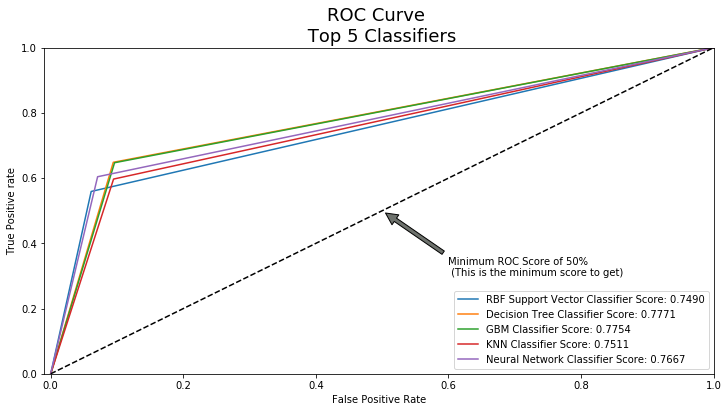

In [52]:
XGboost_tree_fpr, XGboost_tree_tpr, XGboost_tree_threshold = roc_curve(y_test,boost_pred )
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)
r_svc_fpr, r_svc_tpr, r_svc_threshold = roc_curve(y_test, svm_pred)
NN_fpr, NN_tpr, NN_threshold = roc_curve(y_test, NN_pred)
Knn_fpr, Knn_tpr, Knn_threshold = roc_curve(y_test, Knn_pred)
    
graph_roc_curve_t_multiple(XGboost_tree_fpr, XGboost_tree_tpr, r_svc_fpr, r_svc_tpr,
                            tree_fpr, tree_tpr,Knn_fpr, Knn_tpr,NN_fpr, NN_tpr)
plt.show()

In [51]:

def graph_roc_curve_t_multiple(XGboost_tree_fpr, XGboost_tree_tpr,r_svc_fpr, r_svc_tpr,
                            tree_fpr, tree_tpr,Knn_fpr, Knn_tpr,NN_fpr, NN_tpr):
    plt.figure(figsize=(12,6))
    plt.title('ROC Curve \n Top 5 Classifiers', fontsize=18)
   
    plt.plot(r_svc_fpr, r_svc_tpr, label='RBF Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, 
                                                                                                      svm_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, 
                                                                                                tree_pred)))
    plt.plot(XGboost_tree_fpr, XGboost_tree_tpr, label='GBM Classifier Score: {:.4f}'.format(
         roc_auc_score(y_test,boost_pred)))
    plt.plot(Knn_fpr, Knn_tpr, label='KNN Classifier Score: {:.4f}'.format(
         roc_auc_score(y_test,Knn_pred)))
    plt.plot(NN_fpr, NN_tpr, label='Neural Network Classifier Score: {:.4f}'.format(
         roc_auc_score(y_test,NN_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive rate', fontsize=10)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
            )
    plt.legend()